# Simple regression with TensorFlow

Progressive example working through various network set ups

https://towardsdatascience.com/training-neural-networks-for-price-prediction-with-tensorflow-8aafe0c55198

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
X = np.load("./rbfs/phi_reduce.npy")
y = np.load("./rbfs/y.npy")

In [5]:
y.min()

0.0

(array([291., 137., 193., 177., 213., 311., 405., 588., 304.,  50.]),
 array([0.    , 0.0044, 0.0088, 0.0132, 0.0176, 0.022 , 0.0264, 0.0308,
        0.0352, 0.0396, 0.044 ]),
 <BarContainer object of 10 artists>)

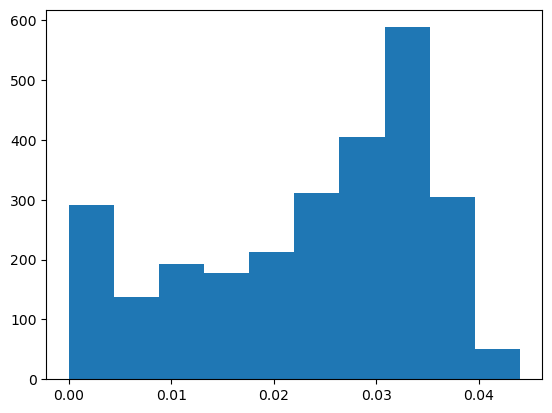

In [6]:
plt.hist(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

## TensorFlow

In [8]:
# Set random seed
tf.random.set_seed(42)
from keras import Sequential
from keras import models
from keras import layers

In [9]:
n_feat = X_train.shape[1]

### Model 1 (Simple TF regression)

In [21]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Initial_model")
model.summary()

Model: "Initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               103424    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 596225 (2.27 MB)
Trainable params: 5962

In [22]:
# Compile the model
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [23]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
2/2 [==============================] - 0s 90ms/step - loss: 0.0913 - mae: 0.0913 - mse: 0.0190 - val_loss: 0.0956 - val_mae: 0.0956 - val_mse: 0.0135
Epoch 2/50
2/2 [==============================] - 0s 27ms/step - loss: 0.0800 - mae: 0.0800 - mse: 0.0099 - val_loss: 0.0541 - val_mae: 0.0541 - val_mse: 0.0040
Epoch 3/50
2/2 [==============================] - 0s 29ms/step - loss: 0.0422 - mae: 0.0422 - mse: 0.0027 - val_loss: 0.0422 - val_mae: 0.0422 - val_mse: 0.0024
Epoch 4/50
2/2 [==============================] - 0s 27ms/step - loss: 0.0371 - mae: 0.0371 - mse: 0.0020 - val_loss: 0.0151 - val_mae: 0.0151 - val_mse: 3.4585e-04
Epoch 5/50
2/2 [==============================] - 0s 29ms/step - loss: 0.0176 - mae: 0.0176 - mse: 4.4424e-04 - val_loss: 0.0122 - val_mae: 0.0122 - val_mse: 2.2612e-04
Epoch 6/50
2/2 [==============================] - 0s 25ms/step - loss: 0.0140 - mae: 0.0140 - mse: 2.8681e-04 - val_loss: 0.0136 - val_mae: 0.0136 - val_mse: 2.7491e-04
Epoch 7/50
2/2

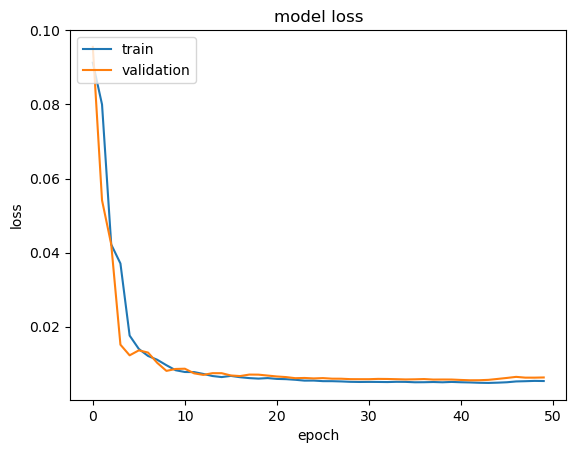

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

17/17 [==============================] - 0s 1ms/step


0.0060274115893873175

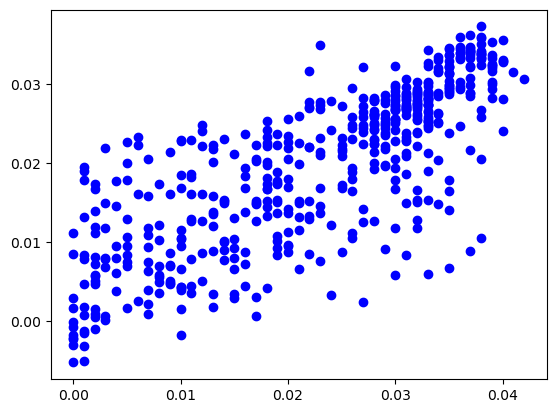

In [26]:
plt.plot(y_test, y_test_pred, 'bo')

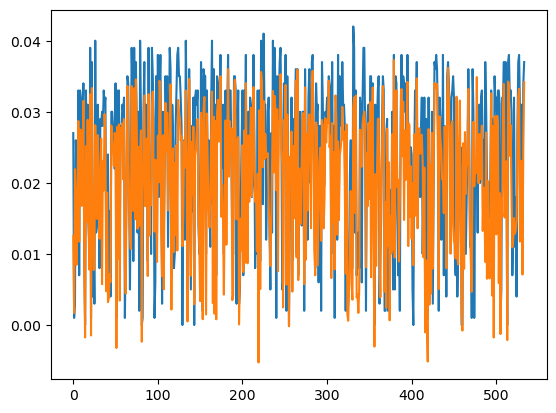

In [28]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()

### Regularization with drop-outs

In [16]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dropout(0.2),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Dropout")
model.summary()

Model: "Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               103424    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               6579

In [17]:
# Compile the model
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [18]:
history=model.fit(X_train, y_train, epochs=200, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 0s 106ms/step - loss: 0.1369 - mae: 0.1369 - mse: 0.0311 - val_loss: 0.0236 - val_mae: 0.0236 - val_mse: 9.1778e-04
Epoch 2/200
2/2 [==============================] - 0s 31ms/step - loss: 0.0580 - mae: 0.0580 - mse: 0.0050 - val_loss: 0.0443 - val_mae: 0.0443 - val_mse: 0.0022
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0464 - mae: 0.0464 - mse: 0.0031 - val_loss: 0.0331 - val_mae: 0.0331 - val_mse: 0.0013
Epoch 4/200
2/2 [==============================] - 0s 29ms/step - loss: 0.0323 - mae: 0.0323 - mse: 0.0015 - val_loss: 0.0115 - val_mae: 0.0115 - val_mse: 2.3416e-04
Epoch 5/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0206 - mae: 0.0206 - mse: 6.7657e-04 - val_loss: 0.0187 - val_mae: 0.0187 - val_mse: 4.6278e-04
Epoch 6/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0223 - mae: 0.0223 - mse: 7.4865e-04 - val_loss: 0.0107 - val_mae: 0.0107 - val_mse: 1.4902e-04
Epo

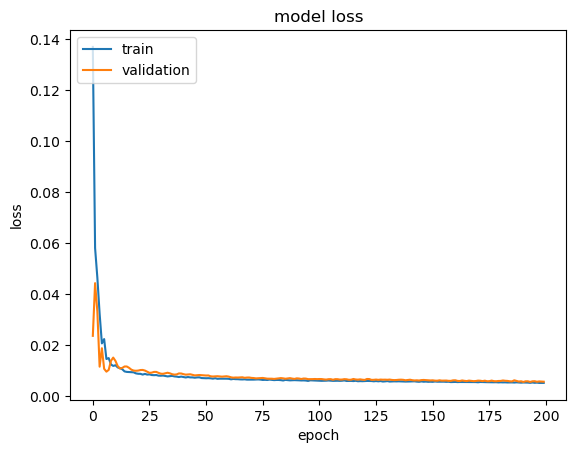

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

17/17 [==============================] - 0s 1ms/step
0.0053087090450209965


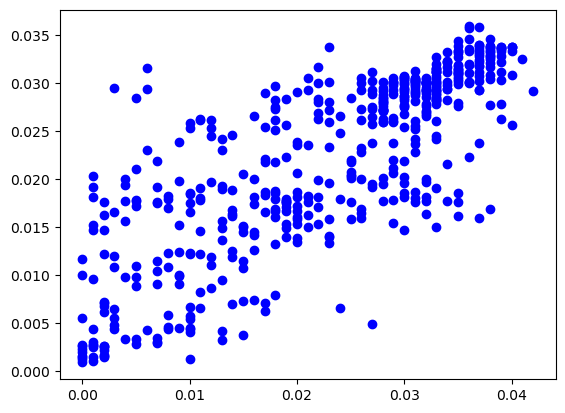

In [20]:
y_test_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_test_pred))
plt.plot(y_test, y_test_pred, 'bo')